# 46-932, Simulation Methods for Option Pricing: Homework 1

*Author*  : Jordan Giebas <br>
*Due Date*: Jan. 25, 2018

## Question 1
Practice on the Probability Integral Transform. 

### 1a

The pdf given is:

\\[ f_X(x) =
    \begin{cases} 
      k\lambda(\lambda x)^{k-1}e^{-(\lambda x)^{k}}& x\geq 0 \\
      0 & x < 0
   \end{cases}
\\]

Hence, we must determine the form of the cdf and then perform the Probability Integral Transform. <br>


\\[ F_X(x) = P(X < x) = \int_{-\infty}^{x} f_X(s)ds = \int_{0}^{x} k\lambda(\lambda s)^{k-1}e^{-(\lambda s)^{k}}ds \\]

Making the substitution $u = -(\lambda s)^{k}$, it follows that $du = k\lambda(\lambda s)^{k-1}ds$. The lower limit remains zero, and the upper limit becomes $(\lambda x)^{k}$. We then have,

\\[ F_X(x) = \int_{0}^{(\lambda x)^{k}} e^{-u} du \\]

Solving this integral, we find that the cdf of this distribution is of the form

\\[ F_X(x) =
    \begin{cases} 
      1 - e^{-(\lambda x)^{k}} & x\geq 0 \\
      0 & x < 0
   \end{cases}
\\]

Setting $u = F_X(x)$ (over the non-trivial domain) and solving for $x$ is quite easy,

\\[ u = F_X(x) = 1 - e^{-(\lambda x)^{k}} \implies 1 - u = e^{-(\lambda x)^{k}} 
                                          \implies (\lambda x)^{k} = ln\big(\frac{1}{1-u}\big)
                    \implies x = \frac{1}{\lambda}\big(ln\big(\frac{1}{1-u}\big)\big)^{\frac{1}{k}} := g(u)\\]
                               
It follows that simulating random variables with $f_X(x)$ as the pdf is equivalent to applying the above function, $g(u)$, to simulated standard uniform random variables.

### 1c

The pdf given is:

\\[ f_X(x) = \frac{1}{\pi}\frac{1}{1+x^2}\\]

Hence, we must determine the form of the cdf and then perform the Probability Integral Transform. <br>


\\[ F_X(x) = P(X < x) = \int_{-\infty}^{x} f_X(s)ds = 
\int_{-\infty}^{x} \frac{1}{\pi}\frac{1}{1+s^2} ds \\]

The substitution to be made is $s = tan(\theta)$, equipped with $ds = sec^2(\theta)d\theta$, this becomes quite an easy integral. I happened to recall this by observation from CalcII?, so I state the result for the indefinite integral. 

\\[ \int \frac{1}{1+x^2} dx = arctan(x) \\]

Now we just analyze the boundaries- we have an improper integral as the lower bound is $-\infty$, therefore we take a limit

\\[ F_X(x) = \int_{-\infty}^{x} \frac{1}{\pi}\frac{1}{1+s^2} ds 
           = \frac{1}{\pi}(arctan(x) - \lim_{b\to-\infty} arctan(b))\\]

Examining the graph of $f(x) = arctan(x)$, it's clear that $\lim_{x\to-\infty} arctan(x) = -\frac{\pi}{2}$. Hence, we (finally) have the final form of the cdf.

\\[ F_X(x) = \frac{1}{\pi}arctan(x) + \frac{1}{2}, x \in \mathbb{R} \\]

Setting $u = F_X(x)$ and solving for $x$,

\\[ u = F_X(x) = \frac{1}{\pi}(arctan(x) + \frac{1}{2}) \implies 2\pi u = 2arctan(x) + \pi 
                                           \implies \frac{2\pi u - \pi}{2} = arctan(x)
                                           \implies x = tan\big(\frac{\pi}{2}(2u-1)\big) := g(u) \\]

                               
It follows that simulating random variables with a *cauchy distribution* is equivalent to applying the above function, $g(u)$, to simulated standard uniform random variables.



## Question 2

## Question 3
Studying the quality of various normal generation methods. <br>

Simulate three sets of observations (n=100,1000,10,000) to have the standard normal distribution using methods (a) and (b). Construct a Q-Q (normal) plot for each, comment on the quality of the methods based on your normal plots. 

### 3a
Use the normal generator within the language we plan to use for the course.

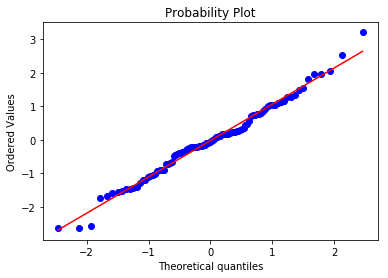

In [59]:
# Use numpy's normal RV generator
import numpy as np
import pylab 
import scipy.stats as stats
import matplotlib

def get_plt(data):
    
    stats.probplot(data, dist="norm", plot=pylab)
    pylab

# Sample the normal distribution
norm_rv = [np.random.normal(size=n) for n in [100, 1000, 10000]]

get_plt(norm_rv[0])

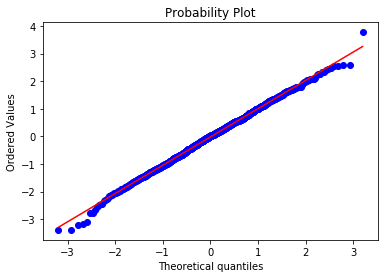

In [60]:
get_plt(norm_rv[1])

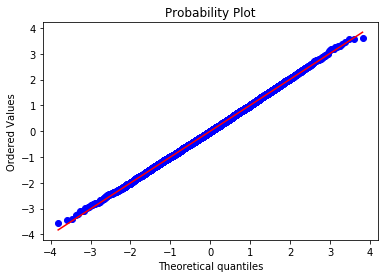

In [61]:
get_plt(norm_rv[2])

It appears that as $n$ gets larger, the data is fit nearly perfectly around the trendline suggesting that the normal generator within python is quite accurate.

### 3b
Use the "poor man's" normal generator: simulate 12 standard uniform vars $\{U_{i}\}_{i=1}^{12}$, and compute $\sum_{i=1}^{12} U_{i}-6$

In [62]:
# Generate 12 independent standard uniform rvs

def gen_pm_norm_rv():
    u_rv = np.random.uniform(size=12)
    return ( np.sum(u_rv) - 6.0 )


l_100 = list()
for i in range(100):
    l_100.append(gen_pm_norm_rv())
    
pm_norm_rv = [[gen_pm_norm_rv() for i in range(n)] for n in [100,1000,1000]]

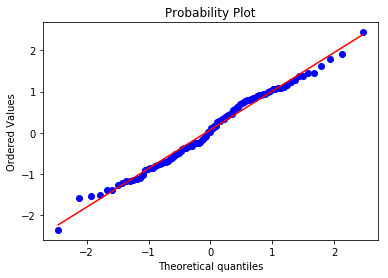

In [63]:
get_plt(pm_norm_rv[0])

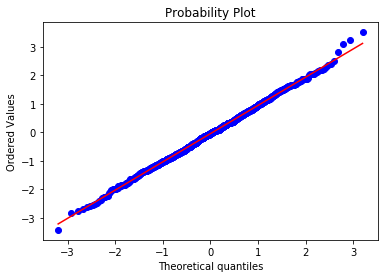

In [64]:
get_plt(pm_norm_rv[1])

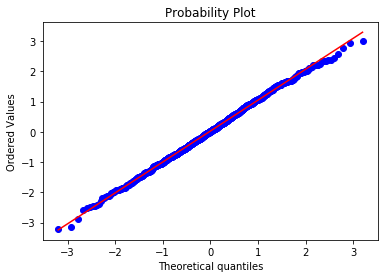

In [65]:
get_plt(pm_norm_rv[2])

Using the "poor man's normal generator" yields quite good results actually. However, they are certainly not as precise as using Python's normal random number generator. One can see this by simply comparing the $n=10,000$ plots. There is more variability at the extreme ends of the "poor man's" plot than in the plot constructed with Python's generator. 

# Question 2 below, will put above later

In [190]:
import pandas as pd
import numpy as np


########################################################
"""
Alias Table Construction
    From the matrix provided, build an alias table 
    (type pd.DataFrame()) for each row. Once this is done, 
    then stack the alias tables on top of one another
"""
########################################################

# We need to build a dataframe from the matrices given
# to pass into build_dataframe. This way we can reuse that 
# function in constructing the alias table. (i=1 rn)
def df_from_matrix( mat_df, i ):
    
    f_row = mat_df.loc[i]
    j_s = pd.Series(np.arange(1,9), index=pd.RangeIndex(start=1, stop=9))
    df = pd.DataFrame()
    df[0] = j_s
    df[1] = f_row
    df.index = pd.RangeIndex(start=0, stop=8)
    
    return df

# input : File path string
# output: Dataframe containing the discrete probability distribution
def build_dataframe( df ):
    
    #df = pd.read_csv(file_path, header=None)             # Read csv, label the columns
    
    df.columns = ['x','p']
    df = df.sort_values(by=['p'])                        # Sort by probability in Ascending order
    df['p_star'] = df['p']*(len(df.index) - 1)           # p*_i = (m-1)*p_i
    df.index = range(0,len(df.index))                    # Reindex afterwards
    
    return df


# input : Dataframe containing the discrete probability distribution
# output: Alias table for discrete distribution (constant time evaluation for simulation)
def build_alias_table( pmf_df ):
    
    # Build alias table
    alias_table = pd.DataFrame(columns=list('PXA'))

    while(len(pmf_df.index) != 1):

        # Update the Alias Table
        tmp = pd.DataFrame([[pmf_df.p_star[0], pmf_df.x[0], pmf_df.x[len(pmf_df.index)-1]]], columns=list('PXA'))
        alias_table = alias_table.append(tmp, ignore_index=True)

        # Alter the dataframe
        pmf_df.p_star[len(pmf_df.index)-1] -= (1-pmf_df.p_star[0]) # Subtaract (1-p*_1) from p*_max
        pmf_df = pmf_df.drop([0])                                  # Drop the (x1,p*_1) row
        pmf_df = pmf_df.sort_values(by=['p_star'])                 # Sort values as needed
        pmf_df.index = range(0,len(pmf_df.index))                  # Reindex the dataframe to begin at 0
        
    return alias_table

    
## Get the stacked alias table
def stacked_alias_table( mat ):
    
    #return pd.concat([build_alias_table( build_dataframe( df_from_matrix(P, i) ) ) 
                         #for i in range(1, len(mat)+1)]) 
    a_t = [build_alias_table( build_dataframe( df_from_matrix(P, i) ) ) for i in range(1, len(mat)+1)]
    
    return a_t, pd.concat(a_t)

########################################################
"""
Functions for HW1, Q2 (a) and (b)

1) 'exp_rv': used to generate the holding
   time of a given state, given the parameter sitting in 
   the appropritate row of the params DataFrame().
2) 'alias_algo': used to generate a possible state to 
   transition to from the finite distribution provided
   within the Q-matrix. (I think it should be P??)
"""
########################################################


"""
Function:
generate exponentially distributed random numbers
using the probability integral transform
"""
def exp_rv( lambda_i ):
    
    return ( (-1.0/lambda_i)*np.log(1-np.random.uniform()) )


## Aliasing algorithm
def alias_algo( a_table ):
    
    u = np.random.uniform() # Generate a Uniform(0,1) RV
    v = len(a_table)*u
    i = np.ceil(v)
    w = i - v
    
    if w <= a_table.P.loc[i-1]:
        return a_table.X.loc[i-1]
    else:
        return a_table.A.loc[i-1]
    

"""
Construct the:
    Q-matrix
    M-matrix
    lambda-vector (params)
"""


Q = pd.DataFrame(np.array(
  [[-.1154, .1019, .0083, .0020, .0031, 0, 0, 0],    
  [.0091, -.1043, .0787, .0105, .0030, .0030, 0, 0],   
  [.0010, .0309, -.1172, .0688, .0107, .0048, 0, .0010],    
  [.0007, .0047, .0713, -.1711, .0701, .0174, .0020, .0049],    
  [.0005, .0025, .0089, .0813, -.2530, .1181, .0144, .0273],
  [0, .0021, .0034, .0073, .0568, -.1928, .0479, .0753],
  [0,0,.0142, .0142, .0250, .0928, -.4318, .2856],
  [0, 0, 0, 0, 0, 0, 0, 0]]), 
                 index=pd.RangeIndex(start=1, stop=9, step=1),
                 columns=pd.RangeIndex(start=1, stop=9, step=1))


P = pd.DataFrame(np.array(
    [[0,.8838, .0720, .0173, .0269, 0, 0, 0],
    [.0872, 0, .7545, .1007, .0288, .0288, 0,0],
    [.0085, .2637, 0, .5870, .0913, .0410, 0, .0085],
    [.0041, .0275, .4167, 0, .4097, .1017, .0117, .0286],
    [.0020, .0099, .0352, .3213, 0, .4668, .0569, .1079],
    [0, .0109, .0176, .0379, .2946, 0, .2484, .3906],
    [0, 0, .0329, .0329, .0579, .2149, 0, .6614],
    [0,0,0,0,0,0,0,1]]), 
                 index=pd.RangeIndex(start=1, stop=9, step=1),
                 columns=pd.RangeIndex(start=1, stop=9, step=1))


params = pd.DataFrame(np.array([.1154, .1043, .1172, .1711, .2530, .1929, .4318, .0001]),
                   index=pd.RangeIndex(start=1, stop=9, step=1),
                   columns=[1])


In [191]:
sat_l, sat = stacked_alias_table(Q)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
## Not needed just extra:
ratings = {1: 'AAA', 2: 'AA', 3: 'A', 4: 'BBB', 5: 'BB', 6: 'B', 7: 'CCC', 8: 'D'}


# Now that the stacked alias table is constructed, we perform the actual problem.
T = 5

test_dict = {}
test_dict[1] = list()

for k in range(10):
    print("k: ", k)

    # Start in a particular state, and start clock at 0
    i = 1
    clock = 0

    while( clock <= T ):

        # Generate the holding time
        ht = exp_rv(float(params.loc[i]))

        # Update the clock
        clock += ht

        # Check to see if you're past 'maturity'
        # If so break out of the loop
        if (clock > T):

            #print("The rating (state) is ", ratings[i])
            test_dict[1].append(i)
            break

        else:

            # Choose a new rating (alias algorithm)
            j = alias_algo(sat_l[i-1]) 
            #print("%i transitioned to %i" % (i, j))
            i = j 


            
            
            
## NEED TO RUN THE SIMULATIONS, and DERIVE THE P_{i,j} table